In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation

In [29]:
model_list = [jR.grieco(), jR.erbb(), jR.blt(), jR.bauer(), jR.cohen(), jR.colitis_jijoo(), jR.saez()]
dict_list = []
rc_class_list = ['C0', 'C1', 'C3']
for model in model_list:
    network_name = model['network_name']
    defined_logic_pd = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    simple_rule_pd = pd.read_csv('../data/' + network_name + '_simple_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    merge_pd = pd.merge(left=defined_logic_pd['Class'], right=simple_rule_pd['Class'], left_index=True, right_index=True, how='left',suffixes=('_dl', '_sr'))
    
    for rc_class in rc_class_list:
        real_true = merge_pd['Class_dl'] == rc_class
        positive = merge_pd['Class_sr'] == rc_class
        
        pre = precision_score(real_true, positive)
        rec = recall_score(real_true, positive)
        acc = accuracy_score(real_true, positive)
        bacc = balanced_accuracy_score(real_true, positive)
        f1 = f1_score(real_true, positive)
        
        dict_list.append({'network_name': network_name,
                          'class': rc_class,
                          'pre': pre, 'rec': rec, 'acc': acc, 'bacc': bacc, 'f1': f1})
        

/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/jijoo/miniconda3/envs/theor/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
result_pd = pd.DataFrame(dict_list)
print(result_pd.head())

  network_name class       pre       rec       acc      bacc        f1
0       Grieco    C0  0.714286  0.833333  0.869565  0.857843  0.769231
1       Grieco    C1  0.700000  0.736842  0.760870  0.757310  0.717949
2       Grieco    C3  0.750000  0.818182  0.891304  0.866234  0.782609
3         ERBB    C0  0.333333  0.250000  0.722222  0.553571  0.285714
4         ERBB    C1  0.714286  0.833333  0.666667  0.583333  0.769231


<AxesSubplot:xlabel='network_name', ylabel='f1'>

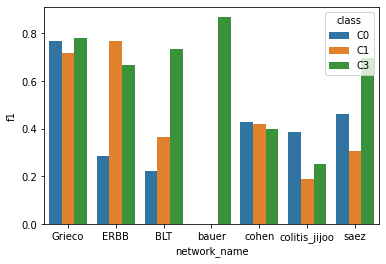

In [31]:
sns.barplot(data=result_pd, x='network_name', y='f1', hue='class')

In [32]:
melted_result_pd = pd.melt(result_pd, id_vars=['network_name', 'class'])
print(melted_result_pd.head())

  network_name class variable     value
0       Grieco    C0      pre  0.714286
1       Grieco    C1      pre  0.700000
2       Grieco    C3      pre  0.750000
3         ERBB    C0      pre  0.333333
4         ERBB    C1      pre  0.714286


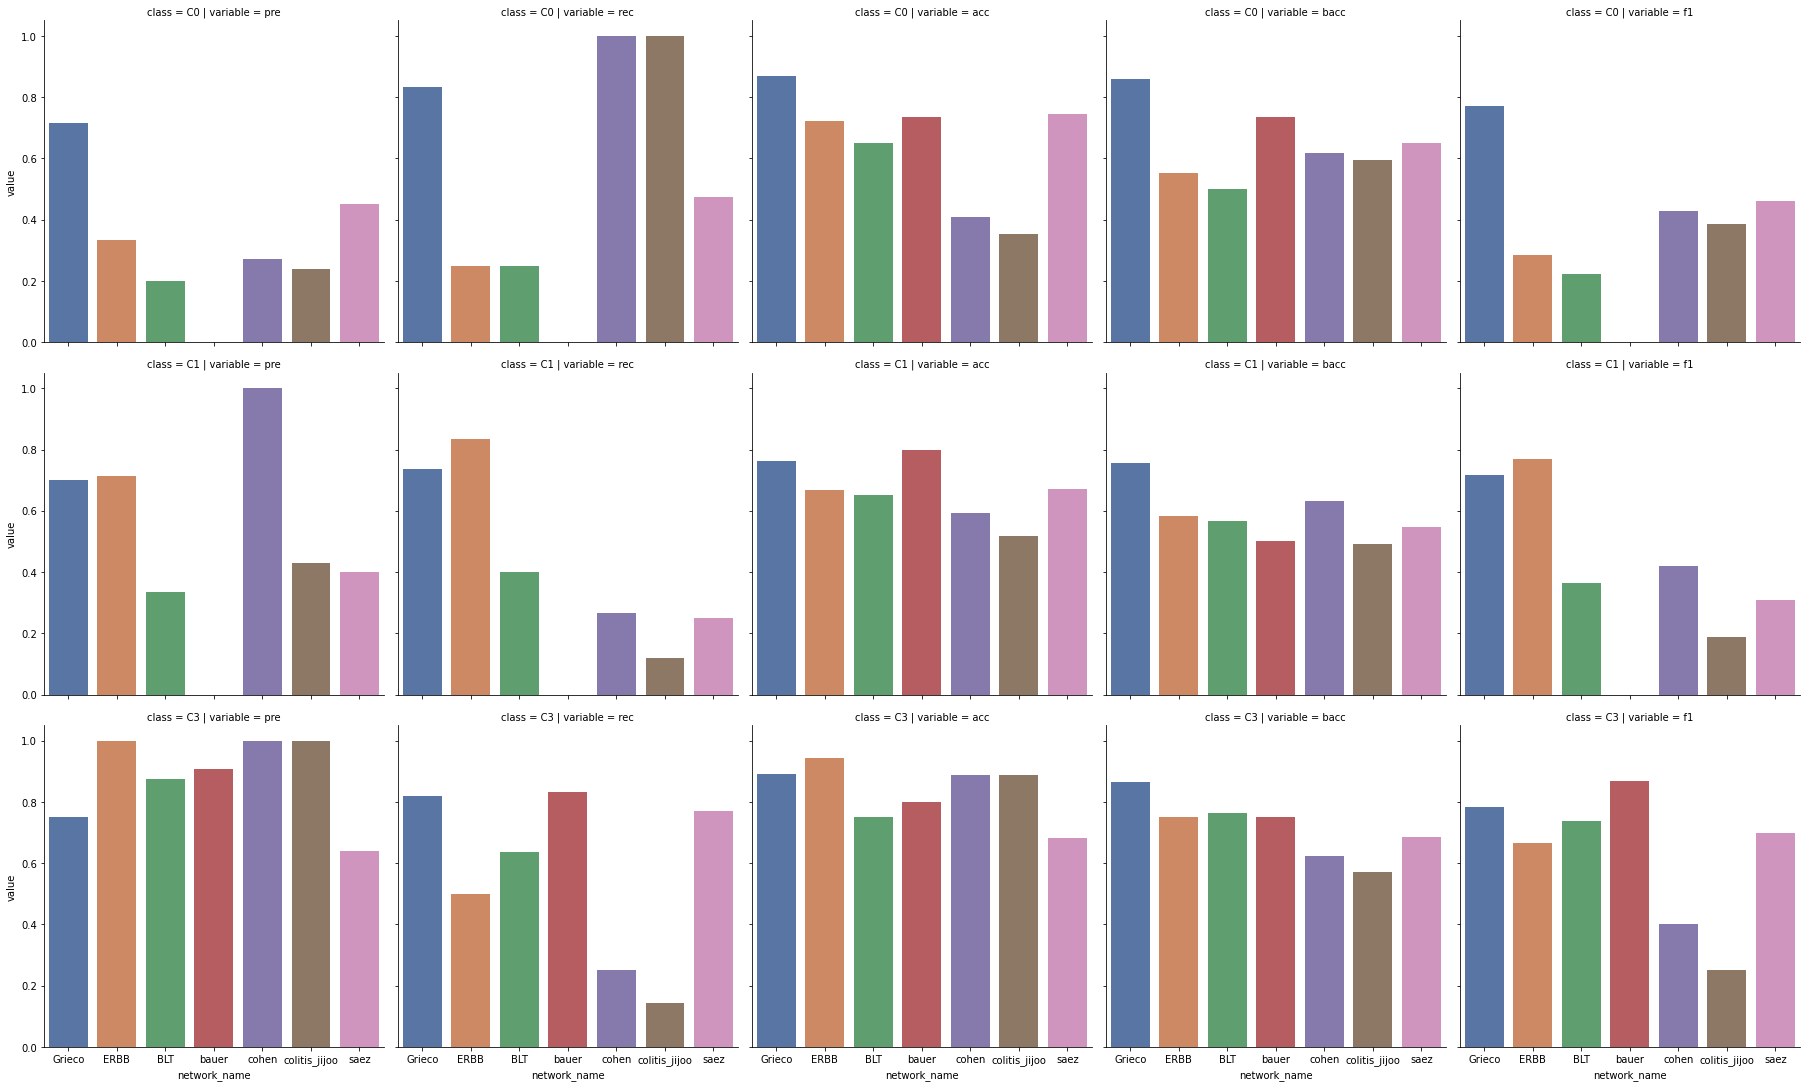

In [36]:
sns.catplot(data=melted_result_pd, kind='bar', x='network_name', y='value', row='class', col='variable', palette="deep")

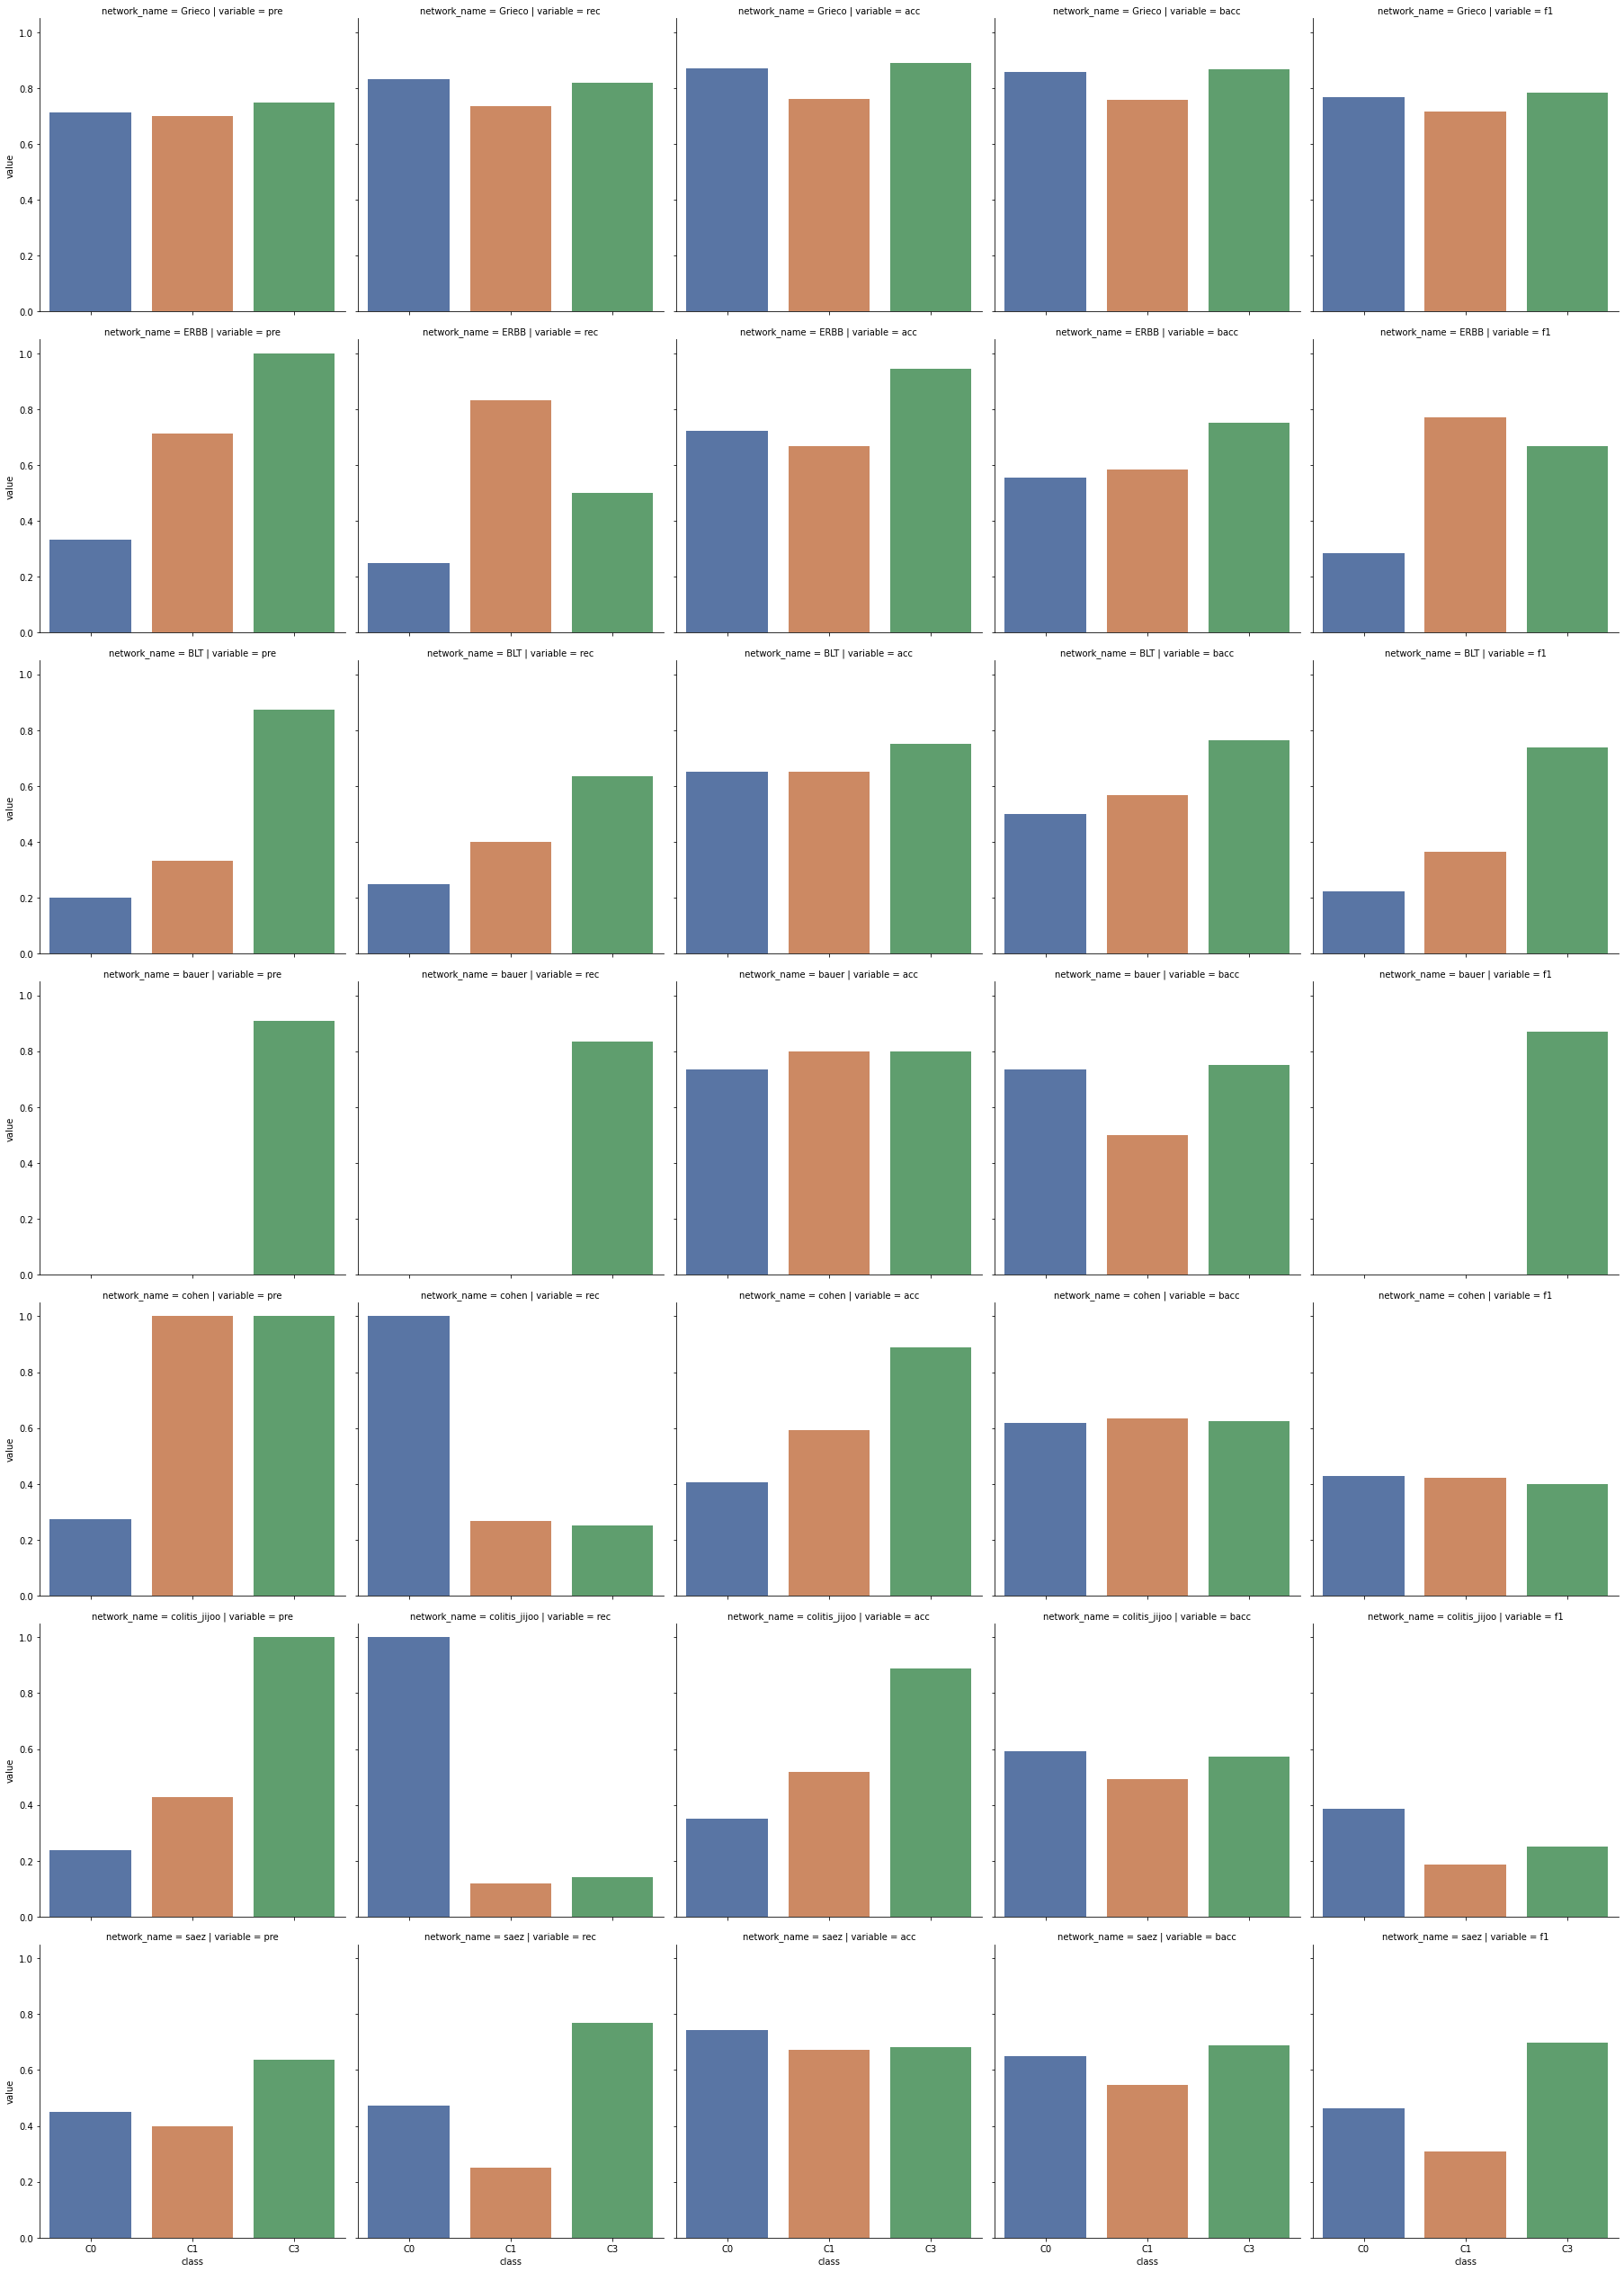

In [67]:
sns.catplot(data=melted_result_pd, kind='bar', x='class', y='value', row='network_name', col='variable', palette="deep")

In [60]:
dict_list2 = []
for model in model_list:
    network_name = model['network_name']
    network = nx.read_gml('../networks/' + network_name + '_topology.gml')
    dl_ex = nx.read_gml('../networks/' + network_name + '_expanded_network.gml')
    sr_ex = nx.read_gml('../networks/' + network_name + '_simple_expanded_network.gml')
    defined_logic_pd = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    simple_rule_pd = pd.read_csv('../data/' + network_name + '_simple_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    merge_pd = pd.merge(left=defined_logic_pd['Class'], right=simple_rule_pd['Class'], left_index=True, right_index=True, how='left',suffixes=('_dl', '_sr'))
    
#     num_feecbacks = len(list(nx.simple_cycles(network)))
    num_nodes = len(network)
    num_dl_comp = len(dl_ex) - 2 * num_nodes
    num_sr_comp = len(sr_ex) - 2 * num_nodes
    acc_ratio = sum(merge_pd['Class_dl'] == merge_pd['Class_sr']) / num_nodes
    
    dict_list2.append({'network_name': network_name,
                      'num_nodes': num_nodes,
#                       'num_feedbacks': num_feecbacks,
                      'num_dl_comp': num_dl_comp,
                      'num_sr_somp': num_sr_comp,
                      'diff_comp': num_sr_comp - num_dl_comp,
                      'acc_ratio' : acc_ratio,
                      'ratio_c0': sum(merge_pd['Class_dl'] == 'C0')/ num_nodes,
                      'ratio_c1': sum(merge_pd['Class_dl'] == 'C1')/ num_nodes,
                      'ratio_c2': sum(merge_pd['Class_dl'] == 'C2')/ num_nodes,
                      'ratio_c3': sum(merge_pd['Class_dl'] == 'C3')/ num_nodes
                     })

In [71]:
network_pd[['network_name', 'num_nodes','num_feedbacks']]

,network_name,num_nodes,num_feedbacks
0,Grieco,53,556
1,ERBB,20,8
2,BLT,30,45
3,bauer,21,3
4,cohen,32,7808478
5,colitis_jijoo,60,4369
6,saez,101,106


In [61]:
network_pd2 = pd.DataFrame(dict_list2)
print(network_pd2.head())

  network_name  num_nodes  num_dl_comp  num_sr_somp  diff_comp  acc_ratio  \
0       Grieco         53           63           93         30   0.622642   
1         ERBB         20           16           18          2   0.600000   
2          BLT         30           44           37         -7   0.333333   
3        bauer         21            8            9          1   0.476190   
4        cohen         32           83          979        896   0.343750   

   ratio_c0  ratio_c1  ratio_c2  ratio_c3  
0  0.226415  0.358491  0.075472  0.207547  
1  0.200000  0.600000  0.000000  0.100000  
2  0.133333  0.166667  0.000000  0.366667  
3  0.000000  0.142857  0.000000  0.571429  
4  0.187500  0.468750  0.062500  0.125000  


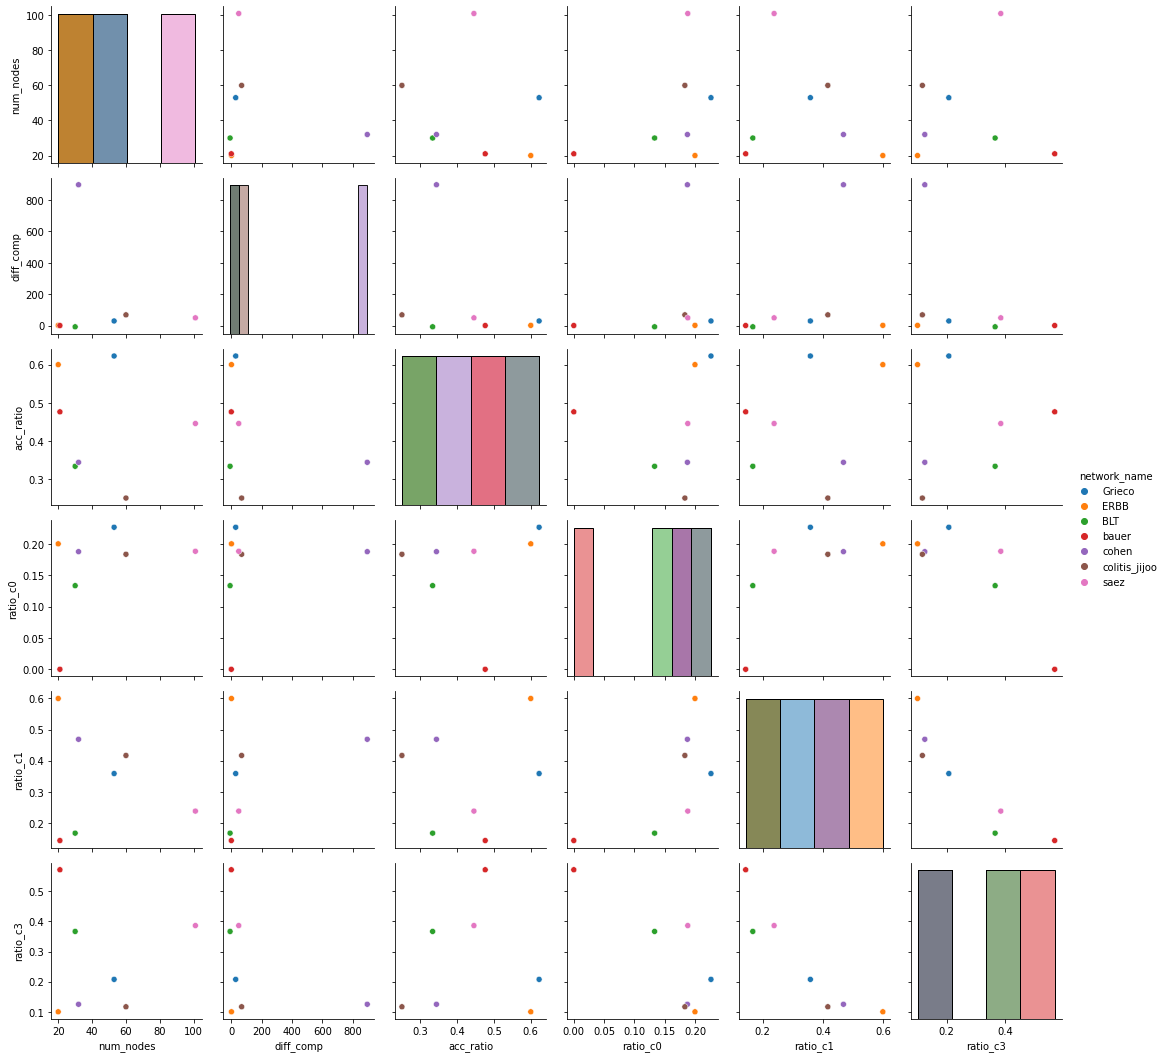

In [49]:
g = sns.PairGrid(network_pd2, vars=["num_nodes", "diff_comp", "acc_ratio", "ratio_c0", 'ratio_c1', 'ratio_c3'], hue="network_name")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [65]:
network_name = 'bauer'
defined_logic_pd = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
simple_rule_pd = pd.read_csv('../data/' + network_name + '_simple_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
merge_pd = pd.merge(left=defined_logic_pd['Class'], right=simple_rule_pd['Class'], left_index=True, right_index=True, how='left',suffixes=('_dl', '_sr'))

In [66]:
merge_pd

,Class_dl,Class_sr
node,,
Akt,C3,C0
ERK1,C3,C3
FAK,C3,C3
GRB2,C3,C3
GSK3beta,C3,C0
MEK1,C3,C3
PI3K,C3,C3
PTEN,C1,C0
ROCK1,C3,C3
